In [1]:
%config Completer.use_jedi = False

In [2]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
THRESHOLD = 74

In [4]:
start = time.time()
data = pd.read_csv('train.csv')
end = time.time()
print(end - start)


1.1483705043792725


In [5]:
from sklearn.utils import shuffle
data = shuffle(data)

In [6]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27338,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2819,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15054,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18618,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33075,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.shape

(42000, 785)

[  9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 113 233 254 253 254 253 254 131   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  21
 183 253 212  50  50  91  50 131 252  82   0   0   

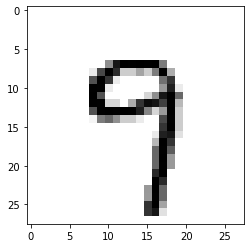

In [8]:
print(data.iloc[0].to_numpy())
pic = data.iloc[0].to_numpy()
plt.imshow(pic[1:].reshape(28,28), cmap="binary")


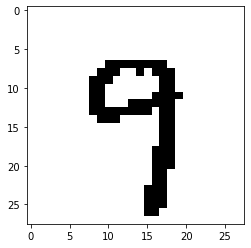

In [9]:

for i in range(1,len(pic)-1):
    if pic[i] >THRESHOLD:
        pic[i]=255
    else:
        pic[i]=0
plt.imshow(pic[1:].reshape(28,28), cmap="binary")

In [10]:
X = data.iloc [:,1:]#Frame (42000, 784)
y = data ["label"]#series (42000,)


In [11]:
from sklearn.model_selection import train_test_split 
# Split the dataset into a training set and a validation set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
#train 29400, 0.70 of the data
#test 6300, 0.3 of the data
#validation 6300, 0.21 of the data 

print(len(X_train),len(y_train))
print(len(X_val),len(y_val))
print(len(X_test),len(y_test))


sample = {"train": range(0,700), "val":range(700,850), "test":range(850,1000)}

X_train_LASSO, X_test_LASSO, X_val_LASSO= X.iloc[sample["train"]], X.iloc[sample["test"]], X.iloc[sample["val"]]
y_train_LASSO, y_test_LASSO, y_val_LASSO= y.iloc[sample["train"]], y.iloc[sample["test"]], y.iloc[sample["val"]]

print(X_train.iloc[1].to_numpy(), len(X_train.iloc[1].to_numpy()))

29400 29400
6300 6300
6300 6300
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  45 235 210  16   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  41 232 254 250  29   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  15 149 254 254 161   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   7 199 254 254 234  85   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   7 147 254 254 245  38   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  57 254 25

In [12]:
type(X_train)
X_train.shape

(29400, 784)

In [13]:
# Applying the threshold condition
X_train=X_train.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')
X_test=X_test.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')
X_val=X_val.apply(lambda x: [ 0 if i<THRESHOLD else 1 for i in x], axis=1, result_type='broadcast')

#print(X_train.iloc[1].to_numpy())

<div class=" alert alert-warning"> 

- Training set size: 29400
- Test set size: 6300 
- validation set size: 6300 
    
</div>

In [14]:
from sklearn.neural_network import MLPClassifier
num_layers_clf = [1]+[i*2 for i in range (1,6)]    # number of hidden layers,
num_neurons = 16       # number of neurons of each layer, we fix this to 16 in this task

hidden_layers = tuple([num_neurons]*num_layers_clf[1]) #16x16 for test


In [22]:
start_time = time.time()
mlp_clf1 = MLPClassifier(hidden_layer_sizes= hidden_layers, max_iter = 2000, learning_rate_init = 0.01, random_state = 42, activation = 'logistic')
mlp_clf1.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 31.837900161743164 seconds ---


In [23]:
from sklearn.metrics import accuracy_score
y_pred_train = mlp_clf1.predict(X_train)
tr_acc = accuracy_score(y_train, y_pred_train)
print(tr_acc)

0.9902380952380953


In [25]:
y_pred_val = mlp_clf1.predict(X_val)
tr_acc = accuracy_score(y_val, y_pred_val)
print(tr_acc)

0.9111111111111111


In [26]:
y_pred_test = mlp_clf1.predict(X_test)
tr_acc = accuracy_score(y_test, y_pred_test)
print(tr_acc)

0.9165079365079365
